# Supervised Learning - Neural Networks

> #### Linear Separability
> When two sets can be separated by a flat line/plane.

### Example of Non-linear separable example:
#### The XOR problem
`x1 x2 f
0  0  0
0  1  1
1  0  1
1  1  0`

## Multi-layer Perceptron a.k.a Neural Network
Connected Perceptron's where one neuron feeds to several neurons in the next layer.

> CAREFUL! In some textbooks, the input features count as a "layer" of the network. So 3-layer networks might actually be 2-layer!

## Simple Example:
Only 1 feature.

`Y: o o o x x x o o o
X: 1 2 3 4 5 6 7 8 9`

This is not linearly separable! BUT is separable by a non-linear function!

$f(x;w_0,...,w_n) = \{_{-1, |x|>1}^{1, |x| < 1}$

This can be solved by having two neurons in a hidden layer between input and output-neuron: one with a sign(1+x) function and one with a sign(1-x) function! All the output-neuron has to do is add the two functions together and voila!

So what does this network actually do? Well, effectively the hidden layer puts the input into a linearly separable two-dimensional space! (two neurons, two outputs, two dimensions)

# THE PURPOSE FOR ALL LAYERS IS THAT THE FINAL LAYER SHOULD BE ABLE TO LINEARLY SEPARATE THE CLASSES

<b>Cover's Theorem:</b> The probability that classes are linearly separable increases when the features are nonlinearly mapped to a higher-dimensional feature space.

## The Perceptron

$\epsilon(\vec{w}) = \sum_{i=1}^{N}(\sigma(\vec{w}^T\vec{x}_i)-y_i)^2$

### Different nonlinear activation functions
- Step/sign function: non-differentiable!
- Hyperbolic tangent
    
    $\sigma(s) = \tanh(s)$
    
- The Fermi-function
    
    $\sigma(s) = \frac{1}{1+e^{-s}}$
    
- Gaussian function
    
    $\sigma(s;\gamma) = e^{\frac{s^2}{\gamma^2}}$
    
> Using non-linear activation-functions makes classifying easier, as it will be less affected by some data-points lying vary far from the separation-line.
    
### Example: Radial Basis Function
(same example as before)

A gaussian function can immediately map the values in 1 dimensions in a separable manner.

## Updated Minimization algorithm

$\epsilon(\vec{w}) = \sum_{i=1}^{N}(\sigma(\vec{w}^T\vec{x}_i)-y_i)^2$

$\frac{\partial\epsilon}{\partial\vec{w}} = 2\sum_{i=1}^{N}(\sigma(\vec{w}^T\vec{x}_i)-y_i)\sigma'(\vec{w}^T\vec{x}_i)\vec{x}_i$

Gradient descent:

$\vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} \pm{} \eta$ $\frac{\partial\epsilon}{\partial{}\vec{w}}$

## Training Multi-Layer Networks
Cost function:

$\epsilon(\vec{w}) = \sum_{k=1}^K\sum_{m=1}^K(y_{mk} - z_{mk}(\vec{w}))^2$

$\vec{w}$ is all weights, $K$ is number of training examples, $M$ is number of output nodes, $y$ is desired output, $z$ is actual output.

> <b>This has become too math-heavy: follow the lecture notes for vital information</b>

This can be simplified by removing one summation: simply running one sample at a time and updating the weights from only that sample:

### Stochastic gradient descent

$\epsilon(\vec{w}) = \sum_{m=1}^K(y_{m} - z_{m}(\vec{w}))^2$


$\vec{w}_{ij}^{(t+1)} \leftarrow \vec{w}_{ij}^{(t)} \pm{} \eta$ $\frac{\partial\epsilon}{\partial{}\vec{w}_{ij}}$

Called stochastic as a single random sample is a randomly good estimator for the total dataset. The $ij$ stands for from node $i$ to node $j$.

## Training the Network:
Back-propagate differentialization! <b>SEE LECTURE SLIDES</b>

## Pros & Cons of Neural Networks
- A multi-layered network can theoretically learn any class boundary.
- The large number of parameters is a problem:
    - Local optima at high risk => suboptimal performance
    - Overfitting is easy => poor generalization
    - The convergence is slow => long training times

## Preventing Overfitting: Early Stopping
Look at performance on training data and performance on validation-data at the same time. When validation-data start being scored worse than a previous iteration: STOP!

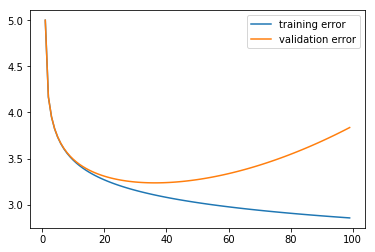

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

X = np.arange(1, 100)
Y = [5-math.log(i)**0.5 for i in X]
Y2 = [5-math.log(i)**0.5 + (i/100)**2 for i in X]
plt.plot(X, Y, label = 'training error')
plt.plot(X, Y2, label = 'validation error')
plt.legend()
plt.show()

This is why we need 3 datasets: training, validation, and testing, since the validation-data will also be used for training.

## For Faster Convergence
Some tips for making the network converge faster:

- Normalize input features to the range [-1, 1] or at least to the same scale as each other.
- Separate and adaptive step length for each weight;
    - If the derivative has the same sign in several consecutive steps, step length should increase. If the sign changes, instead decrease the step length.
- Introduce a <i>momentum term</i>, e.g. include a part of the previous update in the new update.

## How many layers?
- One layer is enough to produce any classification boundary.
- Complex boundaries needs fewer nodes if you have more layers.
- With ordinary backpropagation training (as seen here) there is no real advantage to more than 3 layers because of the vanishing gradient problem (the magnitude of the error is decreased each layer).
- Modifications of activation functions or the like enable many layers => DEEP LEARNING.